In [5]:
import numpy as np 
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [7]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0


In [8]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


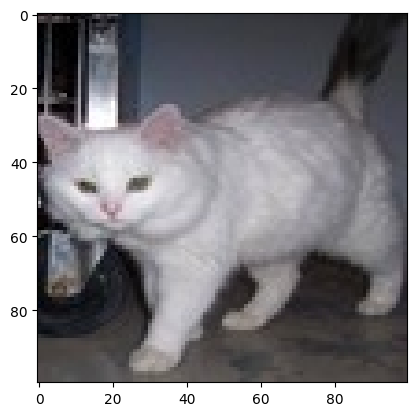

In [9]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

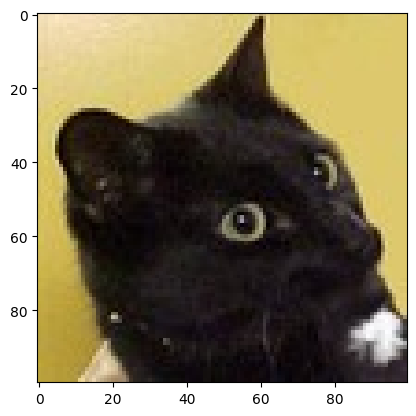

NameError: name 'model' is not defined

In [ ]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2,:])
plt.show()



In [11]:
model= Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\DOLESH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5305 - loss: 0.7410
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5890 - loss: 0.6658
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6710 - loss: 0.6076
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7155 - loss: 0.5646
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.7390 - loss: 0.5155


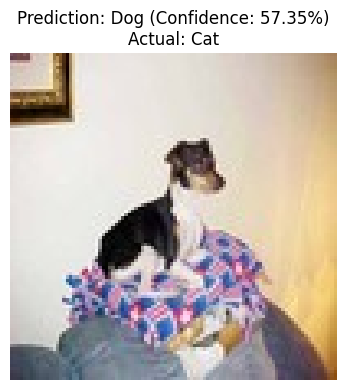

Index: 0
Predicted: Dog (0.5735)
Actual: Cat (0.0)


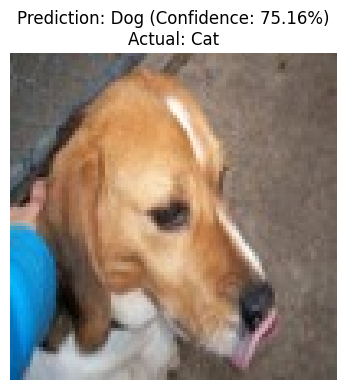

Index: 10
Predicted: Dog (0.7516)
Actual: Cat (0.0)


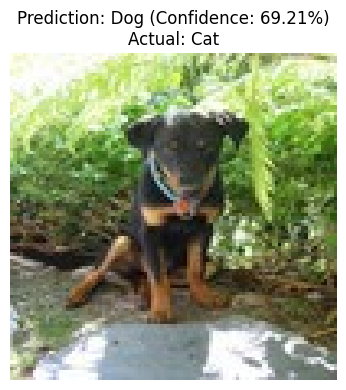

Index: 25
Predicted: Dog (0.6921)
Actual: Cat (0.0)


In [15]:

def predict_image(index):
    """Predict if image at given index is a cat or dog"""
    img = X_test[index].reshape(1, 100, 100, 3)
    prediction = model.predict(img, verbose=0)
    

    plt.figure(figsize=(6, 4))
    plt.imshow(X_test[index])
    
  
    if prediction[0][0] > 0.5:
        label = "Dog"
    else:
        label = "Cat"
    
    plt.title(f"Prediction: {label} (Confidence: {prediction[0][0]:.2%})\nActual: {'Dog' if Y_test[index][0] == 1 else 'Cat'}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Index: {index}")
    print(f"Predicted: {label} ({prediction[0][0]:.4f})")
    print(f"Actual: {'Dog' if Y_test[index][0] == 1 else 'Cat'} ({Y_test[index][0]})")


predict_image(0)      
predict_image(10)    
predict_image(25)     